In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot  as plt
import pandas as pd


In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [10]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178
4,South Jack,3/6/2019 4:28,34.58,3908451377344
5,South Latoya,3/11/2019 12:26,9.52,1994999424437
6,New Paulville,2/27/2019 11:17,43.25,793208410091
7,Simpsonburgh,4/26/2019 0:43,35.98,111953927754
8,South Karenland,1/8/2019 3:28,35.09,7995623208694
9,North Jasmine,3/9/2019 6:26,42.81,5327642267789


In [11]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [12]:
# Get the columns and the rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [13]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [14]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [15]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [16]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [17]:
# Get the columns and the rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [18]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [19]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame.
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [20]:
# Create the Urban city Dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [22]:
# Create the suburban and rural city Dataframe
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
suburban_cities_df.head()


,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6653622887913,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6575961095852,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,966911700371,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5706770909868,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2273047151891,12,Suburban


In [23]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1076079536213,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1985256326182,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4018025271936,2,Rural


In [25]:
#  Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [26]:
#  Get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [28]:
#  Get the number of rides for urban cities
#  Get the number of rides for urban cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [29]:
# Get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [30]:
# Get average fare for each city in the suburban cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [31]:
# Get average fare for each city in the rural cities
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [33]:
#  Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [35]:
#  Get the average number of drivers for each suburban city
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [36]:
#  Get the average number of drivers for each suburban city
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

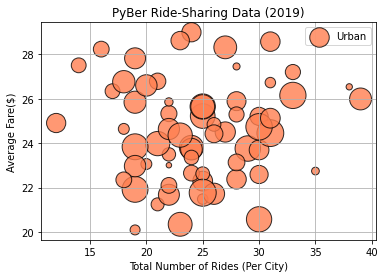

In [39]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare,
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

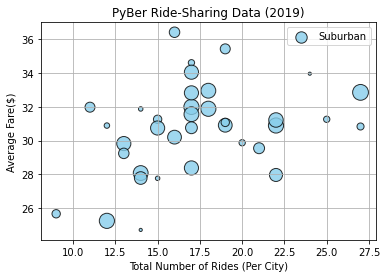

In [40]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

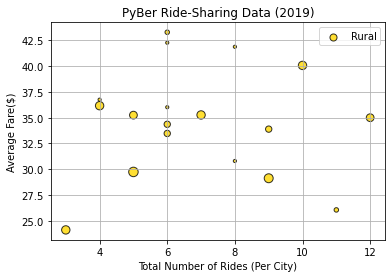

In [41]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, rural_avg_fare,
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

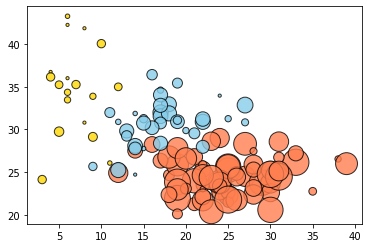

In [42]:
# Add the three plt.scatter() functions for each chart to one cell and run the cell
plt.scatter(urban_ride_count, urban_avg_fare,
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Urban")


plt.scatter(suburban_ride_count, suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Suburban")


plt.scatter(rural_ride_count, rural_avg_fare,
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Rural")

plt.show()

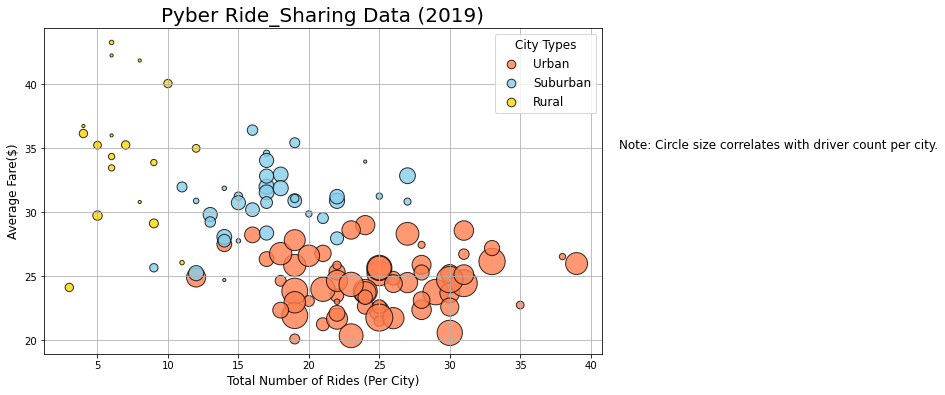

In [47]:
# Build the scatter charts for each city type
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, urban_avg_fare,
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare,
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties 
plt.title("Pyber Ride_Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True) 
#Add the legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")            
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about the circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure
plt.savefig("Analysis/Fig1.png")
plt.show()

In [92]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [93]:
# Get summary statistics
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [94]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [95]:
import numpy as np
import scipy.stats as sts

# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for the urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for the urban trips is {median_urban_ride_count:}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for the urban trips is {mode_urban_ride_count:}.")

The mean for the ride counts for the urban trips is 24.62.
The median for the ride counts for the urban trips is 24.0.
The mode for the ride counts for the urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [96]:
# Get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]


In [97]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for the urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for the urban trips is ${median_urban_fares:}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for the urban trips is {mode_urban_fares:}.")

The mean fare price for the urban trips is $24.53.
The median fare price for the urban trips is $24.64.
The mode fare price for the urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [120]:
# Get the driver count data from the urban cities
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [99]:
# Calculate the measures of central tendency for the driver count for the urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean for the urban trips is ${mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median for the urban trips is ${median_urban_drivers:}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for the urban trips is {mode_urban_drivers:}.")

The mean for the urban trips is $36.68.
The median for the urban trips is $37.0.
The mode for the urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


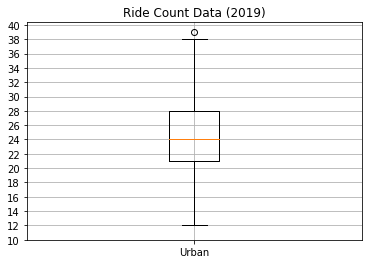

In [100]:
# Create a box-and-whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis, and grid
ax.set_title('Ride Count Data (2019)')
ax.set_label('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

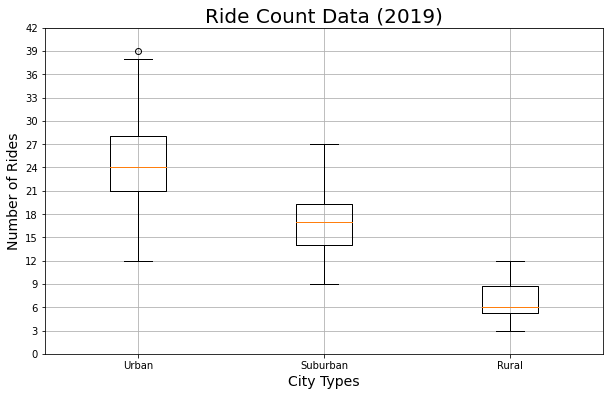

In [106]:
#  Add all the ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure
plt.savefig("Analysis/Fig2.png")
plt.show()

In [102]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


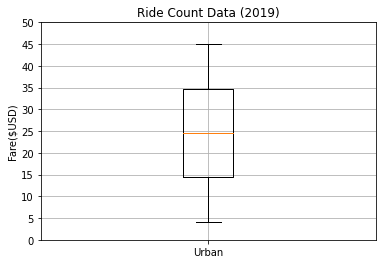

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [103]:
# Create a box and whisker plot for the urban fare data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

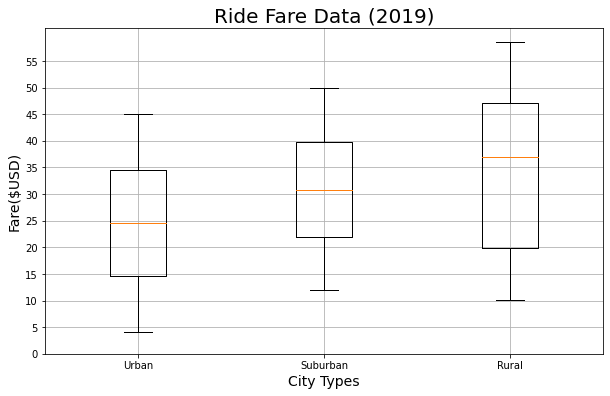

In [105]:
# create a box and whisker plot for all three city types fare data
x_labels = ["Urban", "Suburban", "Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(fares_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

# Save the figure
plt.savefig("Analysis/Fig3.png")
plt.show()

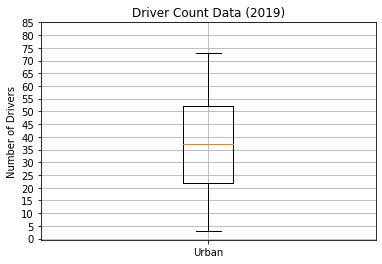

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [121]:
# Create the box and whisker plol for the urban driver count data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

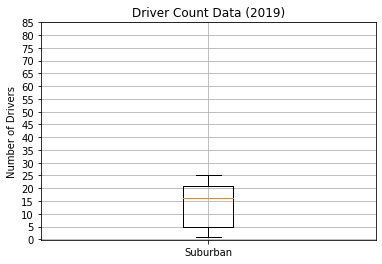

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [123]:
# Create the box and whisker plol for the suburban driver count data
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

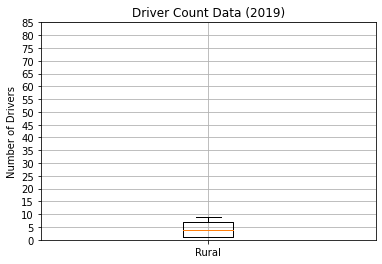

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [124]:
# Create the box and whisker plol for the rural driver count data
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

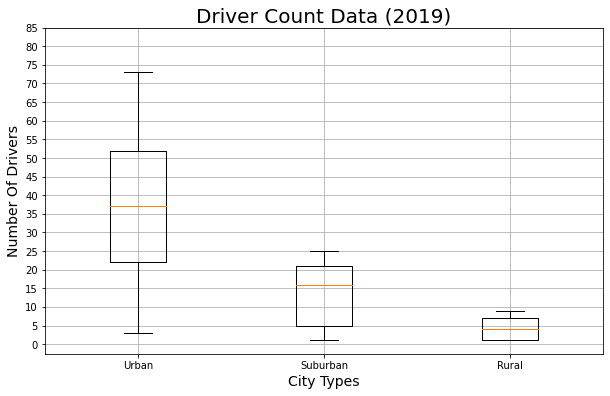

In [128]:
# create a box and whisker plot for all three city types drivr data
x_labels = ["Urban", "Suburban", "Rural"]
driver_counts_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number Of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(driver_counts_data, labels=x_labels)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

# Save the figure
plt.savefig("Analysis/Fig4.png")
plt.show()

In [129]:
# Get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [130]:
# Get the sum of all fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [131]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

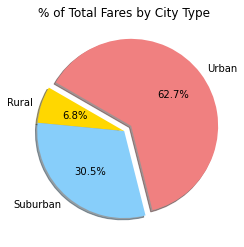

In [135]:
# Build the percentage of fares by city type pie chart
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.show()                           

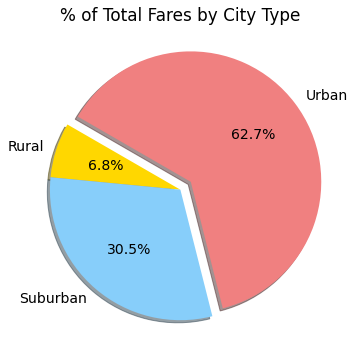

In [137]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig("Analysis/Fig5.png")
plt.show()                           

In [138]:
#  Calculate the percentage of rides for each city type
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

In [ ]:
# Build percentage of rides by city type pie chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig("Analysis/Fig5.png")
plt.show()